# 1.데이터 읽기

In [56]:
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
%matplotlib inline

In [57]:
def kaggle_format(df):
    df['label'][df['label'] == 'none'] = 0
    df['label'][df['label'] == 'offensive'] = 1
    return df

In [58]:
df = pd.read_csv('../../../big_data_sample/pbl/with_soa/clean_dataset.csv',sep = ',',
                 names=['comments', 'label'], header=None, quoting=3)
df.head()


,comments,label
0,개같은 소리 하지마,1
1,좌배 까는건 ㅇㅂ,1
2,개소리야 니가 빨갱이를 옹호하고 드루킹을 ㅇㅇ짓이라고 말못해서 삐진거야 빨갱아,1
3,애새끼가 초딩도 아니고 ㅋㅋㅋㅋ,1
4,731부대의 후예라 그런지 가학적인 아이디어는 세계최고임 이래서 애교만 떨어도 돈 ...,1


In [59]:
#특수문자 제거
import re

df_only_comments = df.iloc[:,[0]]
print(df_only_comments)
comment_without_Special_Characters  = []
for comment in df['comments'][:]:
    comment_without_Special_Characters.append(re.sub("[^가-힣 ㄱ-ㅎ ㅏ-ㅣ \\s]", "", comment )) #한글 아닌 것들 다 제거

index = 0
for comment in comment_without_Special_Characters:
    df['comments'][index] = comment
    index += 1

df

                                                comments
0                                             개같은 소리 하지마
1                                              좌배 까는건 ㅇㅂ
2            개소리야 니가 빨갱이를 옹호하고 드루킹을 ㅇㅇ짓이라고 말못해서 삐진거야 빨갱아
3                                      애새끼가 초딩도 아니고 ㅋㅋㅋㅋ
4      731부대의 후예라 그런지 가학적인 아이디어는 세계최고임 이래서 애교만 떨어도 돈 ...
...                                                  ...
16483                                둘이 친구인 데는 이유가 있었네요.
16484                              톰과 잭이 둘이 친구군요? 이럴 수가.
16485                           내일 드디어 개강이네. 개강 준비는 잘했어?
16486            그럭저럭한 것 같아. 종강한 지 별로 안된 것 같은데 벌써 개강이라니.
16487                                            좋은 소식이야

[16488 rows x 1 columns]


,comments,label
0,개같은 소리 하지마,1
1,좌배 까는건 ㅇㅂ,1
2,개소리야 니가 빨갱이를 옹호하고 드루킹을 ㅇㅇ짓이라고 말못해서 삐진거야 빨갱아,1
3,애새끼가 초딩도 아니고 ㅋㅋㅋㅋ,1
4,부대의 후예라 그런지 가학적인 아이디어는 세계최고임 이래서 애교만 떨어도 돈 벌리는...,1
...,...,...
16483,둘이 친구인 데는 이유가 있었네요,0
16484,톰과 잭이 둘이 친구군요 이럴 수가,0
16485,내일 드디어 개강이네 개강 준비는 잘했어,0
16486,그럭저럭한 것 같아 종강한 지 별로 안된 것 같은데 벌써 개강이라니,0


## 1-1. 데이터 분석

In [60]:
DATA_IN_PATH = '../../../big_data_sample/pbl/with_soa/'
print("파일 크기: ")
for file in os.listdir(DATA_IN_PATH):
    if 'csv' in file and 'zip' not in file:
        print(file.ljust(30)+ str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000,
                                       2))+ 'MB')

파일 크기: 
clean_dataset.csv             1.52MB


In [61]:
print("the number of train data: {}".format(len(df)))

the number of train data: 16488


<h3>(1) 텍스트 데이터의 길이 분석</h3>

In [62]:
df_text_length = df['comments'].apply(len)

In [63]:
print('comment 길이 최대 값: {}'.format(np.max(df_text_length)))
print('comment 길이 평균 값: {:.2f}'.format(np.mean(df_text_length)))
print('comment 길이 표준편차: {:.2f}'.format(np.std(df_text_length)))
print('comment 길이 중간 값: {}'.format(np.median(df_text_length)))

comment 길이 최대 값: 1000
comment 길이 평균 값: 30.79
comment 길이 표준편차: 32.74
comment 길이 중간 값: 25.0


<h3>(2) 단어 단위 분석</h3>

In [64]:
df_word_counts = df['comments'].apply(lambda x:len(x.split(' ')))

Text(0, 0.5, 'Prabability')

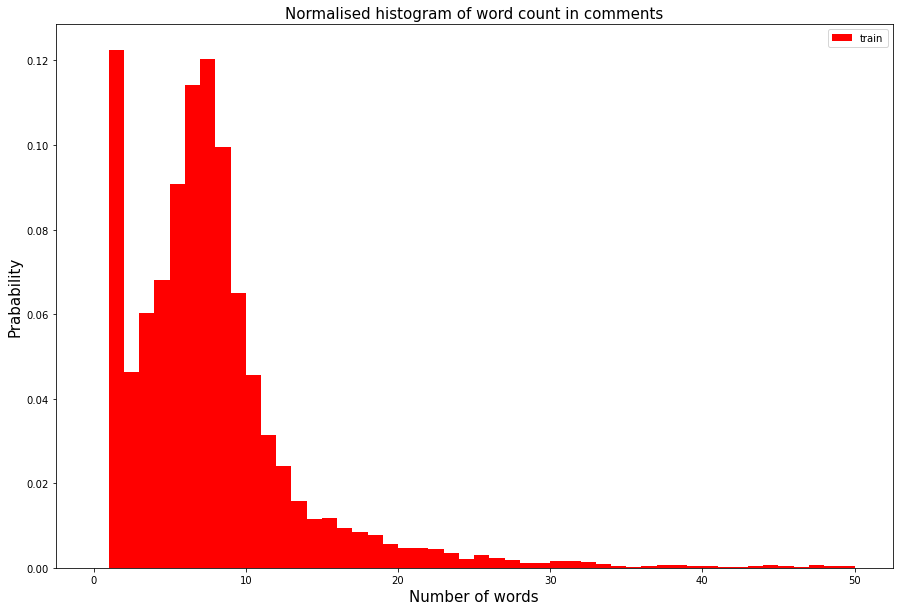

In [65]:
plt.figure(figsize=(15, 10))
plt.hist(df_word_counts, bins=50, range=[0, 50], facecolor='r', density=True, label='train')
plt.title('Normalised histogram of word count in comments', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Prabability', fontsize=15)

In [66]:
print('질문 단어 개수 최대 값: {}'.format(np.max(df_word_counts)))
print('질문 단어 개수 평균 값: {:.2f}'.format(np.mean(df_word_counts)))
print('질문 단어 개수 표준편차: {:.2f}'.format(np.std(df_word_counts)))
print('질문 단어 개수 중간 값: {}'.format(np.median(df_word_counts)))

질문 단어 개수 최대 값: 197
질문 단어 개수 평균 값: 7.60
질문 단어 개수 표준편차: 7.33
질문 단어 개수 중간 값: 6.5
